# 35 Bayesian Networks

http://www.ucdenver.edu/academics/colleges/PublicHealth/Academics/departments/Biostatistics/WorkingGroups/Documents/Networks%20Presentation%20With%20Sachs%20-%20032317.pdf

http://hameddaily.blogspot.ca/2015/02/bayesian-network-in-r-introduction.html

install.packages("bnlearn", dependencies=TRUE)


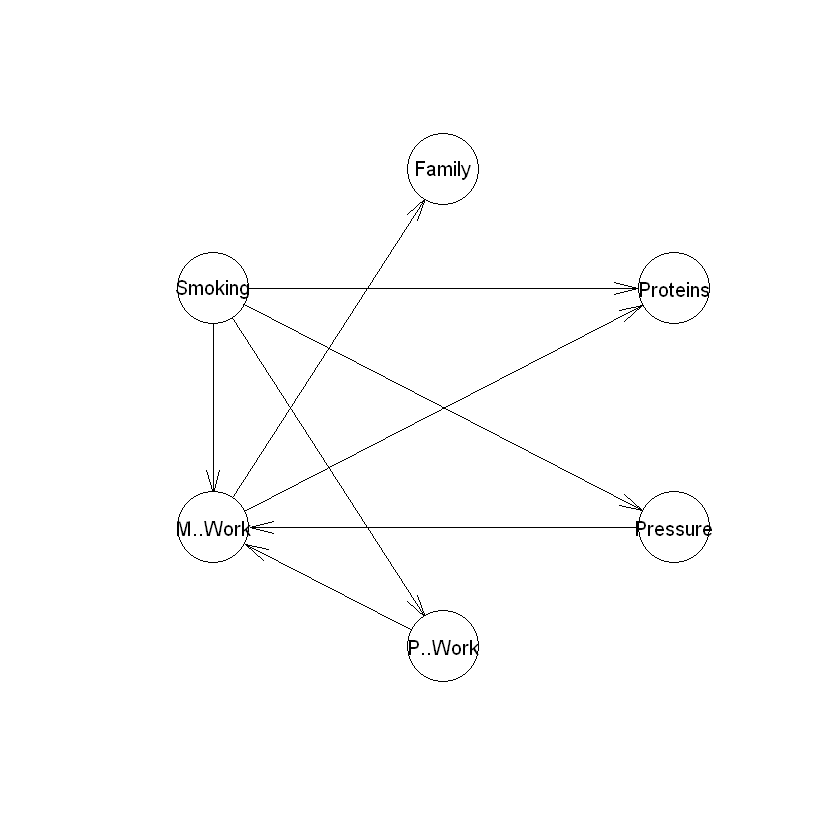

In [9]:
# See: http://hameddaily.blogspot.ca/2015/02/bayesian-network-in-r-introduction.html

library(bnlearn)
data(coronary)
bn_df <- data.frame(coronary)
res <- hc(bn_df)
plot(res)

In [12]:
# Remove the link between M.Work and Family

res$arcs <- res$arcs[-which((res$arcs[,'from'] == "M..Work" & res$arcs[,'to'] == "Family")),]

In [14]:
# find out the conditional probability tables (CPTs) at each node
# The bn.fit function runs the EM algorithm to learn CPT for different nodes

fittedbn <- bn.fit(res, data = bn_df)

In [15]:
print(fittedbn$Proteins)


  Parameters of node Proteins (multinomial distribution)

Conditional probability table:
 
, , M..Work = no

        Smoking
Proteins        no       yes
      <3 0.6685824 0.6167763
      >3 0.3314176 0.3832237

, , M..Work = yes

        Smoking
Proteins        no       yes
      <3 0.5671982 0.3235294
      >3 0.4328018 0.6764706



In [16]:
#  start inferring from the network

cpquery(fittedbn, event = (Proteins=="<3"), evidence = ( Smoking=="no") )

[1] 0.6077182

In [17]:
# What is the chance that a non-smoker with pressure greater than 140 has a Proteins level less than 3? 

cpquery(fittedbn, event = (Proteins=="<3"), evidence = ( Smoking=="no" & Pressure==">140" ) )

[1] 0.6128487

In [18]:
# if a person’s Proteins level is greater than 3, then what is the chance that his or her Pressure level is greater than 140? 

cpquery(fittedbn, event = (Pressure==">140"), evidence = ( Proteins=="<3" ) )

[1] 0.4040194